### Desafío 3: Elaboración de un modelo de clasificación
#### Etapa 2 - Elaboración de un modelo que permita identificar si el personal dedicado a Ciencia y Tecnología presentará alguna producción en el transcurso del año


#### 1. Se prueban diferentes modelos para la tabla que considera Gran Area experticia

In [10]:
#Se importa la funcionalidad necesaria
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
#Lectura de los archivos 
df_train_ga=pd.read_csv('df_train_ga.csv')
df_train_ga.drop(columns='Unnamed: 0',inplace=True)
df_train_ga.head()

,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,sexo_M,"edad_(20, 30]","edad_(30, 40]","edad_(40, 50]","edad_(50, 60]","edad_(60, 70]","edad_(70, 80]",...,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS,Presentó
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,2,6,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,3,4,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
#Lectura de los archivos 
df_test_ga=pd.read_csv('df_test_ga.csv')
df_test_ga.drop(columns='Unnamed: 0',inplace=True)
df_test_ga.head()

,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,sexo_M,"edad_(20, 30]","edad_(30, 40]","edad_(40, 50]","edad_(50, 60]","edad_(60, 70]","edad_(70, 80]",...,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS,Presentó
0,3,8,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,2,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,5,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,3,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,3,2,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [13]:
df_train_ga.columns

Index(['prod_año_anterior', 'prod_2_años_anteriores', 'prod_3_años_anteriores',
       'sexo_M', 'edad_(20, 30]', 'edad_(30, 40]', 'edad_(40, 50]',
       'edad_(50, 60]', 'edad_(60, 70]', 'edad_(70, 80]',
       ...
       'clase_cargo_docente_Profesor titular',
       'clase_cargo_docente_Profesor titular plenario',
       'clase_cargo_docente_Profesor visitante',
       'clase_cargo_docente_no docente',
       'area_exp_CIENCIAS MÉDICAS Y DE LA SALUD',
       'area_exp_CIENCIAS NATURALES Y EXACTAS', 'area_exp_CIENCIAS SOCIALES',
       'area_exp_HUMANIDADES', 'area_exp_INGENIERÍAS Y TECNOLOGÍAS',
       'Presentó'],
      dtype='object', length=101)

In [15]:
#El split en train y test lo habíamos hecho cuando se balanceó la tabla. Ahora hay que adaptarlo
X_train_ga=df_train_ga.drop(columns='Presentó')
y_train_ga=df_train_ga['Presentó']
X_test_ga=df_test_ga.drop(columns='Presentó')
y_test_ga=df_test_ga['Presentó']

In [16]:
#Modelo con KNN = 50
model_KNN_50_ga = KNeighborsClassifier(n_neighbors=50)
model_KNN_50_ga.fit(X_train_ga,y_train_ga)
y_pred_KNN_50_ga = model_KNN_50_ga.predict(X_test_ga)
confusion_matrix(y_test_ga, y_pred_KNN_50_ga)
print(accuracy_score(y_test_ga, y_pred_KNN_50_ga))
print(recall_score(y_test_ga, y_pred_KNN_50_ga))
print(precision_score(y_test_ga, y_pred_KNN_50_ga))

0.7951637846197104
0.7807390240762199
0.6944571690334402


In [17]:
#Modelo con KNN = 10
model_KNN_10_ga = KNeighborsClassifier(n_neighbors=10)
model_KNN_10_ga.fit(X_train_ga,y_train_ga)
y_pred_KNN_10_ga = model_KNN_10_ga.predict(X_test_ga)
confusion_matrix(y_test_ga, y_pred_KNN_10_ga)
print(accuracy_score(y_test_ga, y_pred_KNN_10_ga))
print(recall_score(y_test_ga, y_pred_KNN_10_ga))
print(precision_score(y_test_ga, y_pred_KNN_10_ga))

0.790758704719059
0.7434015707480366
0.7002182876546205


In [18]:
#Modelo con KNN = 100
model_KNN_100_ga = KNeighborsClassifier(n_neighbors=100)
model_KNN_100_ga.fit(X_train_ga,y_train_ga)
y_pred_KNN_100_ga = model_KNN_100_ga.predict(X_test_ga)
confusion_matrix(y_test_ga, y_pred_KNN_100_ga)
print(accuracy_score(y_test_ga, y_pred_KNN_100_ga))
print(recall_score(y_test_ga, y_pred_KNN_100_ga))
print(precision_score(y_test_ga, y_pred_KNN_100_ga))

0.7932892825343268
0.7838290202137247
0.6902494331065759


In [19]:
#Modelo con KNN = 500
model_KNN_500_ga = KNeighborsClassifier(n_neighbors=500)
model_KNN_500_ga.fit(X_train_ga,y_train_ga)
y_pred_KNN_500_ga = model_KNN_500_ga.predict(X_test_ga)
confusion_matrix(y_test_ga, y_pred_KNN_500_ga)
print(accuracy_score(y_test_ga, y_pred_KNN_500_ga))
print(recall_score(y_test_ga, y_pred_KNN_500_ga))
print(precision_score(y_test_ga, y_pred_KNN_500_ga))

0.7925394817001734
0.7741727822840222
0.6922634123877504


In [20]:
#Logistic regression C=1e10
modelo_LR_1e10_ga =  LogisticRegression(penalty='l1',C=1e10)
modelo_LR_1e10_ga.fit(X_train_ga,y_train_ga)
y_pred_LR_1e10_ga=modelo_LR_1e10_ga.predict(X_test_ga)
modelo_LR_1e10_ga.predict_proba(X_test_ga)

print(accuracy_score(y_test_ga, y_pred_LR_1e10_ga))
print(recall_score(y_test_ga, y_pred_LR_1e10_ga))
print(precision_score(y_test_ga, y_pred_LR_1e10_ga))


0.7998031772810347
0.7162353547058066
0.7290001310444241


In [21]:
#Logistic regression C=1

modelo_LR_1_ga =  LogisticRegression(penalty='l1',C=1)
modelo_LR_1_ga.fit(X_train_ga,y_train_ga)
y_pred_LR_1_ga=modelo_LR_1_ga.predict(X_test_ga)
modelo_LR_1_ga.predict_proba(X_test_ga)

print(accuracy_score(y_test_ga, y_pred_LR_1_ga))
print(recall_score(y_test_ga, y_pred_LR_1_ga))
print(precision_score(y_test_ga, y_pred_LR_1_ga))


0.7993814143118234
0.7170078537401828
0.7277835859905907


In [22]:
#Logistic regression C=100
modelo_LR_100_ga =  LogisticRegression(penalty='l2',C=100)
modelo_LR_100_ga.fit(X_train_ga,y_train_ga)

y_pred_LR_100_ga=modelo_LR_100_ga.predict(X_test_ga)

modelo_LR_100_ga.predict_proba(X_test_ga)

print(accuracy_score(y_test_ga, y_pred_LR_100_ga))
print(recall_score(y_test_ga, y_pred_LR_100_ga))
print(precision_score(y_test_ga, y_pred_LR_100_ga))


0.7997563147289002
0.7162353547058066
0.7289046121593291


In [23]:
# Se prueba estandarizar las variables que no son dummies para el modelor que mejor dio.
#Logistic regression C=1 con variables estanarizadas
#Nos quedamos con este modelo para probar con Area experticia y Disciplina experticia

X_train_ga['prod_año_anterior']=scaler.fit_transform(X_train_ga[['prod_año_anterior']])
X_train_ga['prod_2_años_anteriores']=scaler.fit_transform(X_train_ga[['prod_2_años_anteriores']])
X_train_ga['prod_3_años_anteriores']=scaler.fit_transform(X_train_ga[['prod_3_años_anteriores']])

X_test_ga['prod_año_anterior']=scaler.transform(X_test_ga[['prod_año_anterior']])
X_test_ga['prod_2_años_anteriores']=scaler.transform(X_test_ga[['prod_2_años_anteriores']])
X_test_ga['prod_3_años_anteriores']=scaler.transform(X_test_ga[['prod_3_años_anteriores']])

modelo_LR_1_ga =  LogisticRegression(penalty='l1',C=1)
modelo_LR_1_ga.fit(X_train_ga,y_train_ga)

y_pred_LR_1_ga=modelo_LR_1_ga.predict(X_test_ga)
modelo_LR_1_ga.predict_proba(X_test_ga)

print(accuracy_score(y_test_ga, y_pred_LR_1_ga))
print(recall_score(y_test_ga, y_pred_LR_1_ga))
print(precision_score(y_test_ga, y_pred_LR_1_ga))


0.8000843525938423
0.6854641431698211
0.7449279417937597


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_ga, y_pred_LR_1_ga))

             precision    recall  f1-score   support

          0       0.83      0.87      0.85     13572
          1       0.74      0.69      0.71      7767

avg / total       0.80      0.80      0.80     21339



#### 2. Se prueba el mejor modelo que resultó de Gran Area con Area Experticia

In [25]:
#Lectura de los archivos 
df_train_a=pd.read_csv('df_train_a.csv')
df_train_a.drop(columns='Unnamed: 0',inplace=True)
df_train_a.head()

,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,sexo_M,"edad_(20, 30]","edad_(30, 40]","edad_(40, 50]","edad_(50, 60]","edad_(60, 70]","edad_(70, 80]",...,area_exp_Otras Ciencias Agrícolas,area_exp_Otras Ciencias Médicas,area_exp_Otras Ciencias Naturales y Exactas,area_exp_Otras Ciencias Sociales,area_exp_Otras Humanidades,area_exp_Otras Ingenierías y Tecnologías,area_exp_Producción Animal y Lechería,area_exp_Psicología,area_exp_Sociología,Presentó
0,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Lectura de los archivos 
df_test_a=pd.read_csv('df_test_a.csv')
df_test_a.drop(columns='Unnamed: 0',inplace=True)
df_test_a.head()

,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,sexo_M,"edad_(20, 30]","edad_(30, 40]","edad_(40, 50]","edad_(50, 60]","edad_(60, 70]","edad_(70, 80]",...,area_exp_Otras Ciencias Agrícolas,area_exp_Otras Ciencias Médicas,area_exp_Otras Ciencias Naturales y Exactas,area_exp_Otras Ciencias Sociales,area_exp_Otras Humanidades,area_exp_Otras Ingenierías y Tecnologías,area_exp_Producción Animal y Lechería,area_exp_Psicología,area_exp_Sociología,Presentó
0,0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,2,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#El split en train y test lo habíamos hecho cuando se balanceó la tabla. Ahora hay que adaptarlo
X_train_a=df_train_a.drop(columns='Presentó')
y_train_a=df_train_a['Presentó']
X_test_a=df_test_a.drop(columns='Presentó')
y_test_a=df_test_a['Presentó']

In [28]:
#Logistic regression C=1 con variables estanarizadas

X_train_a['prod_año_anterior']=scaler.fit_transform(X_train_a[['prod_año_anterior']])
X_train_a['prod_2_años_anteriores']=scaler.fit_transform(X_train_a[['prod_2_años_anteriores']])
X_train_a['prod_3_años_anteriores']=scaler.fit_transform(X_train_a[['prod_3_años_anteriores']])

X_test_a['prod_año_anterior']=scaler.transform(X_test_a[['prod_año_anterior']])
X_test_a['prod_2_años_anteriores']=scaler.transform(X_test_a[['prod_2_años_anteriores']])
X_test_a['prod_3_años_anteriores']=scaler.transform(X_test_a[['prod_3_años_anteriores']])

modelo_LR_1_a =  LogisticRegression(penalty='l1',C=1)
modelo_LR_1_a.fit(X_train_a,y_train_a)

y_pred_LR_1_a=modelo_LR_1_a.predict(X_test_a)
modelo_LR_1_a.predict_proba(X_test_a)

print(accuracy_score(y_test_a, y_pred_LR_1_a))
print(recall_score(y_test_a, y_pred_LR_1_a))
print(precision_score(y_test_a, y_pred_LR_1_a))

0.7982567130605933
0.6474416230700523
0.7669286577992744


#### 3. Se prueba el mejor modelo que resultó de Gran Area con Disciplina Experticia

In [30]:
#Lectura de los archivos 
df_train_disc=pd.read_csv('df_train_disc.csv')
df_train_disc.drop(columns='Unnamed: 0',inplace=True)
df_train_disc.head()

,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,sexo_M,"edad_(20, 30]","edad_(30, 40]","edad_(40, 50]","edad_(50, 60]","edad_(60, 70]","edad_(70, 80]",...,area_exp_Urología y Nefrología,area_exp_Virología,area_exp_Vulcanología,"area_exp_Zoología, Ornitología, Entomología, Etología",area_exp_Ética (excepto ética relacionada con subáreas específicas),area_exp_Ética Médica,area_exp_Ética relacionada con Biotecnología Agrícola,area_exp_Ética relacionada con Biotecnología Médica,"area_exp_Óptica (incluida Óptica Láser y Óptica Cuántica), Acústica",Presentó
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
#Lectura de los archivos 
df_test_disc=pd.read_csv('df_test_disc.csv')
df_test_disc.drop(columns='Unnamed: 0',inplace=True)
df_test_disc.head()

,prod_año_anterior,prod_2_años_anteriores,prod_3_años_anteriores,sexo_M,"edad_(20, 30]","edad_(30, 40]","edad_(40, 50]","edad_(50, 60]","edad_(60, 70]","edad_(70, 80]",...,area_exp_Urología y Nefrología,area_exp_Virología,area_exp_Vulcanología,"area_exp_Zoología, Ornitología, Entomología, Etología",area_exp_Ética (excepto ética relacionada con subáreas específicas),area_exp_Ética Médica,area_exp_Ética relacionada con Biotecnología Agrícola,area_exp_Ética relacionada con Biotecnología Médica,"area_exp_Óptica (incluida Óptica Láser y Óptica Cuántica), Acústica",Presentó
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#El split en train y test lo habíamos hecho cuando se balanceó la tabla. Ahora hay que adaptarlo
X_train_disc=df_train_disc.drop(columns='Presentó')
y_train_disc=df_train_disc['Presentó']
X_test_disc=df_test_disc.drop(columns='Presentó')
y_test_disc=df_test_disc['Presentó']

In [32]:
#Logistic regression C=1 con variables estanarizadas

X_train_disc['prod_año_anterior']=scaler.fit_transform(X_train_disc[['prod_año_anterior']])
X_train_disc['prod_2_años_anteriores']=scaler.fit_transform(X_train_disc[['prod_2_años_anteriores']])
X_train_disc['prod_3_años_anteriores']=scaler.fit_transform(X_train_disc[['prod_3_años_anteriores']])

X_test_disc['prod_año_anterior']=scaler.transform(X_test_disc[['prod_año_anterior']])
X_test_disc['prod_2_años_anteriores']=scaler.transform(X_test_disc[['prod_2_años_anteriores']])
X_test_disc['prod_3_años_anteriores']=scaler.transform(X_test_disc[['prod_3_años_anteriores']])

modelo_LR_1_disc =  LogisticRegression(penalty='l1',C=1)
modelo_LR_1_disc.fit(X_train_disc,y_train_disc)

y_pred_LR_1_disc=modelo_LR_1_disc.predict(X_test_disc)
modelo_LR_1_disc.predict_proba(X_test_disc)

print(accuracy_score(y_test_disc, y_pred_LR_1_disc))
print(recall_score(y_test_disc, y_pred_LR_1_disc))
print(precision_score(y_test_disc, y_pred_LR_1_disc))

0.8005529781151881
0.6385481219172885
0.7831549557933922


In [36]:
#El Scrore que más nos importa es el de precisión
#Analizamos los resultados:

print('Gran Area expertis -> Precision Score: ',round(precision_score(y_test_ga, y_pred_LR_1_ga),2),
      ', Features: ',X_train_ga.shape[1])

print('Area expertis -> Precision Score: ',round(precision_score(y_test_a, y_pred_LR_1_a),2),
      ', Features: ',X_train_a.shape[1])

print('Disciplina expertis -> Precision Score: ',round(precision_score(y_test_disc, y_pred_LR_1_disc),2),
      ', Features: ',X_train_disc.shape[1])



Gran Area expertis -> Precision Score:  0.74 , Features:  100
Area expertis -> Precision Score:  0.77 , Features:  136
Disciplina expertis -> Precision Score:  0.78 , Features:  330


Si bien el modelo que mejor score presenta es el de disciplina, los 3 son muy parecidos y se decide tomar al de Gran Area ya que es el que menos features contempla.

#### 4. Curva ROC

In [37]:
y_probs_logit = modelo_LR_1_ga.predict_proba(X_test_ga)
fpr_log,tpr_log,thr_log = roc_curve(y_test_ga, y_probs_logit[:,1])
df_RL = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
df_RL.head()

,fpr,tpr,thr
0,0.000000,0.000129,1.000000
1,0.000000,0.000257,1.000000
2,0.000074,0.000257,1.000000
3,0.000074,0.003862,0.999922
4,0.000147,0.003862,0.999913


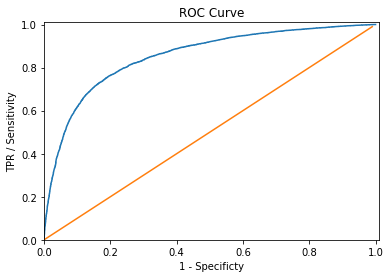

In [38]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_RL['fpr'],df_RL['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

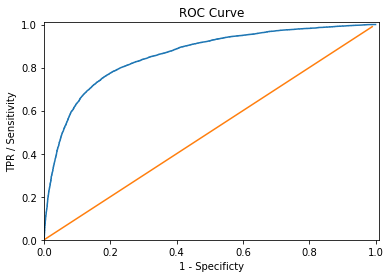

In [32]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_RL['fpr'],df_RL['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [40]:
coef=pd.DataFrame(X_test_ga.columns,columns=['Feature'])
coef['ponderador']=modelo_LR_1_ga.coef_.reshape(100,1)

In [41]:
coef.sort_values(by='ponderador',ascending=False)

,Feature,ponderador
0,prod_año_anterior,1.447459
1,prod_2_años_anteriores,0.322658
13,t_personal_INVESTIGADOR,0.047585
72,clase_cargo_docente_Docente técnico principal,0.000000
35,cat_conicet_Otro personal Conicet,0.000000
42,clase_cargo_docente_Asistente nivel D-3,0.000000
71,clase_cargo_docente_Docente técnico especializado,0.000000
89,clase_cargo_docente_Profesor nivel C,0.000000
30,cat_conicet_Investigador correspondiente,0.000000
83,clase_cargo_docente_Profesor extraordinario,0.000000
